<a href="https://colab.research.google.com/github/MargoRita99/Machine-Learning/blob/main/%D0%9B%D0%A0_5_%D0%9C%D0%B0%D0%BA%D0%B0%D1%80%D0%BE%D0%B2%D0%B0_%D0%91%D0%98%D0%92%D0%A2_22_%D0%A1%D0%9F_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Интеграция данных
**Цель работы**  
На практическом примере освоить основные этапы и приемы интеграции разных таблиц данных в единый датасет средствами Python и pandas для последующей подготовки к машинному обучению.  

**Содержание работы**  
- Прочитайте три однотипных файла с данными по обращениям клиентов в службу технической поддержки. Познакомьтесь со структурой этих трех таблиц и их особенностями.  
- Объедините три эти таблицы в один общий датасет с максимальным соблюдением внутренней согласованности данных.  
- Прочитайте датасет с данными заказов клиентов, присоедините максимальное количество данных из него к датасету, получившемуся на предыдущем шаге.  
- Прочитайте датасет с данными о менеджерах службы клиентской поддержки и также присоедините данные из него к общему датасету.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1 = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML5.1%20data%20integration/data/issues1.csv', index_col=0)
data1.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5


Здесь мы имеем данные об обращениях клиентов онлайн-магазина в службу технической поддержки. Датасет состоит из 11 колонок:

Идентификатор обращения - это уникальная строка, по видимому, генерируемая случайно по алгоритму типа UUID.  
Канал, по которому обращение поступило в систему. Здесь приводится название канала в текстовом виде.  
Категория обращения - также дискретная переменная, один вариант из определенного набора.  
Подкатегория обращения.
К обращению пользователи могут прилагать комментарии. В данном поле собраны эти комментарии в простом текстовом, необработанном виде.  
Идентификатор заказа, по которому сделано обращение. Некоторые значения здесь отсутствуют, то есть обращение может быть связано с заказом, а может и нет.  
Дата поступления обращения в систему. Здесь фиксируется дата и точное время.  
Дата ответа на обращение сотрудника техподдержки. Также дата со временем.  
Дата прохождения клиентом опроса об удовлетворенности работой технической поддержки.  
Имя сотрудника, который работал с этим обращением.  
**Оценка, которую клиент поставил работе технической поддержки. Именно это и является целевой переменной в данном датасете.**  

Прочитаем 2-ой файл данных (45 тыс. обращений). Отличия от предыдущего - отсутствие информации о тексте комментария, а также некоторые колонки называются по-другому

In [ ]:
data2 = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML5.1%20data%20integration/data/issues2.csv', index_col=0)
data2.head()

,Id,channel_name,category,Sub-category,Order_id,Reported at,Responded at,Survey responded at,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,"21 08 2023, 09:01:00 PM","21 08 2023, 09:04:00 PM",21 08 2023,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,"18 08 2023, 09:20:00 PM","18 08 2023, 09:20:00 PM",18 08 2023,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,"24 08 2023, 09:57:00 PM","24 08 2023, 09:58:00 PM",24 08 2023,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,"28 08 2023, 11:38:00 PM","29 08 2023, 05:55:00 AM",29 08 2023,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,"30 08 2023, 11:03:00 AM","30 08 2023, 11:04:00 AM",30 08 2023,L. Beck,5


Отличия от предыдущего - отсутствие информации о тексте комментария, а также некоторые колонки называются по-другому

Прочитаем 3-ю таблицу данных (13 тыс. обращений)

In [ ]:
data3 = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML5.1%20data%20integration/data/issues4.csv', index_col=0)
data3.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,"August 27, 2023, 08:28:00 AM","August 27, 2023, 08:29:00 AM","August 27, 2023, 12:00:00 AM",Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,"December 08, 2023, 03:04:00 PM","August 12, 2023, 03:19:00 PM","August 12, 2023, 12:00:00 AM",Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,"August 13, 2023, 12:45:00 PM","August 13, 2023, 01:02:00 PM","August 13, 2023, 12:00:00 AM",Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,"June 08, 2023, 06:07:00 PM","August 06, 2023, 06:08:00 PM","August 06, 2023, 12:00:00 AM",Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,"April 08, 2023, 10:05:00 PM","August 04, 2023, 10:08:00 PM","August 04, 2023, 12:00:00 AM",Kristin Adams,5


Здесь содержится меньше всего - 13 тысяч обращений. И меньше всего колонок - мы не видим ни текста обращения, ни связанного идентификатора заказа. Еще можно обратить внимание на другой формат дат (хотя во всех трех файлах он разный), и на полное указание имени оператора техподдержки. В двух предыдущих файлах имя оператора указывалось инициалом

Выведем формы всех трех получившихся таблиц

In [ ]:
data1.shape, data2.shape, data3.shape

((28425, 11), (44339, 10), (13143, 9))

Во всех трех наборах представлена примерно одинаковая информация о разных объектах предметной области, постараемся объединить их

**Вертикальная интеграция данных**

Важно любую интеграцию данных проводить последовательно, не стараясь ускорить процесс массовым объединением многих таблиц. Начнем с объединения первой и второй таблицы. Вертикальное объединение осуществляется простой конкатенацией датасетов.

Сначала просто попробуем соединить их

In [ ]:
pd.concat([data1, data2]).head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,channel_name,Reported at,Responded at,Survey responded at
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,NaN,NaN,NaN,NaN
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN


Из-за разности наименования столбцов у нас получилось дублирование: столбцы из второй таблицы не стали продолжением столбцов из первой, а просто добавились в качестве новых. При этом по строкам из первой таблицы в этих столбцах автоматически проставлены пропуски. Такую ситуацию можно сразу отследить по количеству столбцов в итоговом датафрейме. Их должно было быть 11, а стало 10 - явно что-то пошло не так

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    28425 non-null  object
 1   Channel               28425 non-null  object
 2   category              28425 non-null  object
 3   Sub-category          28425 non-null  object
 4   Customer Remarks      28425 non-null  object
 5   Order_id              22389 non-null  object
 6   Issue_reported_Date   28425 non-null  object
 7   Issue_responded_Date  28425 non-null  object
 8   Survey_response_Date  28425 non-null  object
 9   Agent_name            28425 non-null  object
 10  CSAT Score            28425 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.6+ MB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   44339 non-null  object
 1   channel_name         44339 non-null  object
 2   category             44339 non-null  object
 3   Sub-category         44339 non-null  object
 4   Order_id             44272 non-null  object
 5   Reported at          44339 non-null  object
 6   Responded at         44339 non-null  object
 7   Survey responded at  44339 non-null  object
 8   Agent_name           44339 non-null  object
 9   CSAT Score           44339 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 4.7+ MB


Отсюда можно построить схему переименования колонок так, чтобы в обеих таблицах одинаковые по смыслу колонки назывались в точности идентично, например так

In [ ]:
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})

Еще важно следить за тем, чтобы в обеих таблицах были абсолютно одинаковые форматы. Лучший способ этого добиться - перевести все даты во внутренний формат pandas - datetime. Для этого текстовое представление дат нужно распарсить. Обычно, метод to_datetime хорошо справляется с этим автоматически, но иногда приходится указывать конкретный формат даты

In [ ]:
data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])
data2['Survey_response_Date'] = pd.to_datetime(data2['Survey_response_Date'], format='%d %m %Y')

<ipython-input-5-a5e2289ea512>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
<ipython-input-5-a5e2289ea512>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])


После выполнения этих манипуляций сигнатура второй таблицы (набор названий колонок) полностью соответствует первой

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    44339 non-null  object        
 1   Channel               44339 non-null  object        
 2   category              44339 non-null  object        
 3   Sub-category          44339 non-null  object        
 4   Order_id              44272 non-null  object        
 5   Issue_reported_Date   44339 non-null  datetime64[ns]
 6   Issue_responded_Date  44339 non-null  datetime64[ns]
 7   Survey_response_Date  44339 non-null  datetime64[ns]
 8   Agent_name            44339 non-null  object        
 9   CSAT Score            44339 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 4.7+ MB


Приведем даты и в первой таблице

In [ ]:
data1['Issue_reported_Date'] = pd.to_datetime(data1['Issue_reported_Date'], dayfirst=True)
data1['Issue_responded_Date'] = pd.to_datetime(data1['Issue_responded_Date'], dayfirst=True)
data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], format='%d-%b-%y')

Теперь данные в первой и второй таблице в одинаковых форматах

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    28425 non-null  object        
 1   Channel               28425 non-null  object        
 2   category              28425 non-null  object        
 3   Sub-category          28425 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              22389 non-null  object        
 6   Issue_reported_Date   28425 non-null  datetime64[ns]
 7   Issue_responded_Date  28425 non-null  datetime64[ns]
 8   Survey_response_Date  28425 non-null  datetime64[ns]
 9   Agent_name            28425 non-null  object        
 10  CSAT Score            28425 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 3.6+ MB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    44339 non-null  object        
 1   Channel               44339 non-null  object        
 2   category              44339 non-null  object        
 3   Sub-category          44339 non-null  object        
 4   Order_id              44272 non-null  object        
 5   Issue_reported_Date   44339 non-null  datetime64[ns]
 6   Issue_responded_Date  44339 non-null  datetime64[ns]
 7   Survey_response_Date  44339 non-null  datetime64[ns]
 8   Agent_name            44339 non-null  object        
 9   CSAT Score            44339 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 4.7+ MB


Объединение данных

In [ ]:
data_12 = pd.concat([data1, data2])
data_12.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5


Проверка на дубликаты и удаление их

In [ ]:
duplicates = data_12.duplicated()
print(f'Количество дубликатов: {duplicates.sum()}')

data_12 = data_12.drop_duplicates()

Количество дубликатов: 0


In [ ]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72764 entries, 0 to 44338
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    72764 non-null  object        
 1   Channel               72764 non-null  object        
 2   category              72764 non-null  object        
 3   Sub-category          72764 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   72764 non-null  datetime64[ns]
 7   Issue_responded_Date  72764 non-null  datetime64[ns]
 8   Survey_response_Date  72764 non-null  datetime64[ns]
 9   Agent_name            72764 non-null  object        
 10  CSAT Score            72764 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 6.7+ MB


Видим, что теперь все колонки верные, типы данных одинаковые и количество строк увеличилось после соединения таблиц

Теперь посмотрим третью таблицу

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             13143 non-null  object
 1   channel_name          13143 non-null  object
 2   category              13143 non-null  object
 3   Sub-category          13143 non-null  object
 4   Issue_reported at     13143 non-null  object
 5   issue_responded       13143 non-null  object
 6   Survey_response_Date  13143 non-null  object
 7   Agent                 13143 non-null  object
 8   CSAT Score            13143 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.5+ MB


Сделаем переименование колонок

In [ ]:
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})

И также парсим все даты

In [ ]:
data3['Issue_reported_Date'] = pd.to_datetime(data3['Issue_reported_Date'])
data3['Issue_responded_Date'] = pd.to_datetime(data3['Issue_responded_Date'])
data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])

<ipython-input-20-a84f6c2ad651>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])


In [ ]:
data3.head()

,Id,Channel,category,Sub-category,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,2023-08-27 08:28:00,2023-08-27 08:29:00,2023-08-27,Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,2023-12-08 15:04:00,2023-08-12 15:19:00,2023-08-12,Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,2023-08-13 12:45:00,2023-08-13 13:02:00,2023-08-13,Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,2023-06-08 18:07:00,2023-08-06 18:08:00,2023-08-06,Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,2023-04-08 22:05:00,2023-08-04 22:08:00,2023-08-04,Kristin Adams,5


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    13143 non-null  object        
 1   Channel               13143 non-null  object        
 2   category              13143 non-null  object        
 3   Sub-category          13143 non-null  object        
 4   Issue_reported_Date   13143 non-null  datetime64[ns]
 5   Issue_responded_Date  13143 non-null  datetime64[ns]
 6   Survey_response_Date  13143 non-null  datetime64[ns]
 7   Agent_name            13143 non-null  object        
 8   CSAT Score            13143 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 1.5+ MB


Видим, что теперь данные в нужном формате и нужные переименования столбцов. Можем объединять таблицы

In [ ]:
data_123 = pd.concat([data_12, data3])
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5


Проверка на дубликаты и их удаление

In [ ]:
duplicates = data_123.duplicated()
print(f'Количество дубликатов: {duplicates.sum()}')

data_123 = data_123.drop_duplicates()

Количество дубликатов: 0


In [ ]:
data_123.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85907 entries, 0 to 13142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    85907 non-null  object        
 1   Channel               85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   85907 non-null  datetime64[ns]
 7   Issue_responded_Date  85907 non-null  datetime64[ns]
 8   Survey_response_Date  85907 non-null  datetime64[ns]
 9   Agent_name            85907 non-null  object        
 10  CSAT Score            85907 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 7.9+ MB


Видим правильный формат данных и увеличившееся количество строк

In [ ]:
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5


Здесь можно заметить одну ошибку, которую мы пропустили. В первых двух таблицах у нас имя оператора обозначено инициалом, а в третьей - полным именем. Необходимо привести все данные к единому соглашению. Здесь нужно приводить к форме с инициалом, потому что полное имя мы можем сократить до инициала, а только по инициалу восстановить полное имя нельзя. Напишем процедуру, которая преобразует строку нужным нам образом и применим ее ко всей колонке в третьей таблице.

In [ ]:
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

Теперь повторим присоединение третьей таблицы

In [ ]:
data_123 = pd.concat([data_12, data3])

In [ ]:
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5


Таким образом мы правильно провели вертикальное объединение трех таблиц, содержащих информацию о разных объектах в единый датасет

**Добавление данных заказа**

Итак, у нас собраны в одной таблице данные по всем имеющимся обращениям клиентов в техподдержку. Мы могли заметить, что среди полей в этой таблице есть идентификатор заказа. Информация по заказам хранится в отдельной таблице. Прочитаем ее и выведем на экран первые строки

In [ ]:
orders_data = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML5.1%20data%20integration/data/orders.csv', index_col=0)
orders_data.head()

,Id,order_date_time,Customer_City,Product_category,Item_price
0,53465d50-a568-48a9-b96e-ee2a0524fee8,14/08/2023 18:54,NEW DELHI,Books & General merchandise,144.0
1,57d64c28-e3dc-49bd-8e8a-8e24572c6b59,30/07/2023 21:43,HAJIPUR,Home,445.0
2,55d4e1bb-e148-437f-aa83-3bfbae939155,10/07/2023 21:20,HYDERABAD,LifeStyle,399.0
3,509803e9-4c15-4db4-bbe7-fc1e12b6c6cc,08/08/2023 16:40,JASPUR,Mobile,32999.0
4,5cfbe41f-ffcc-4fcf-8520-94bb61dee14e,07/08/2023 08:29,JHAJJAR,Electronics,1499.0


Первый же столбец - это идентификатор заказа, который должен совпадать с идентификатором с общей таблице. Для проведение соединения таблиц в pandas необязательно, но очень облегчает процедуру, если соответствующие столбцы таблиц назывались одинаково. Поэтому переименуем столбец в данной таблице так, чтобы он назывался как в основной

In [ ]:
orders_data = orders_data.rename(columns={
    'Id': 'Order_id',
})

Проведем соединение. Выделим ключевой столбец - тот, по которому будет проводиться сопоставление записей. Самое важное - выбрать тип соединения. В данном случае, нам нужно выбрать все записи из первой (левой) таблицы и присоединить к ним соответствующие столбцы из второй (правой) таблицы. Значит, нужно использовать левое внешнее соединение

In [ ]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
data_with_orders.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN


Соединение прошло успешно. Хоть и ля многих строк в новых столбцах стоят пропуски, просто в таблице заказов есть информация не про каждый заказ, упомянутый в основной таблице. Оценить масштаб пропусков в данных можно с помощью визуализации отсутствующих значений

Создадим heatmap

<Axes: >

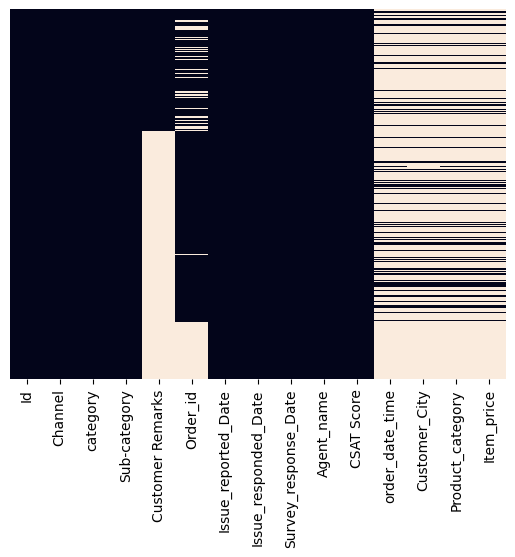

In [ ]:
sns.heatmap(data_with_orders.isnull(), yticklabels=False, cbar=False)

Да данном графике видны, в частности, пропущенные значения в столбцах с комментарием пользователя и идентификатором заказа, которые появились после вертикальной интеграции первых трех таблиц. А по данным заказа мы видим большое количество пропусков. Но там, где нет идентификатора заказа, нет и никакой информации про сам заказ

**Добавление данных менеджеров**

Теперь прочтем таблицу с данными об операторах технической поддержки

In [ ]:
agent_data = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML5.1%20data%20integration/data/agents.csv", index_col=0)
agent_data.head()

,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening
1,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning
2,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning
3,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
4,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning


Всего здесь данные 1300 работниках технической поддержки

В нашей основной таблице есть поле с именем оператора. Похоже, что именно по нему и надо будет проводить соединение. Но для начала нужно убедиться, что в этой новой таблице имя оператора уникальное. Для этого проведем группировку по имени оператора и выведем количество значений по остальным столбцам

In [ ]:
agent_data.groupby(['Agent']).agg('count').head(20)

,Supervisor,Manager,Tenure Bucket,Shift
Agent,,,,
Aaron Edwards,1,1,1,1
Aaron Romero,1,1,1,1
Abigail Gonzalez,1,1,1,1
Adam Barnett,1,1,1,1
Adam Hammond,1,1,1,1
Adam Henderson,1,1,1,1
Adam Hernandez,1,1,1,1
Adam Schwartz,1,1,1,1
Adam Torres,1,1,1,1


Видно, что каждому имени оператора соответствует только одно значение по всем другим столбцам

Однако, в нашей основной таблице операторы названы через инициалы. Давайте в этой таблице также приведем имя оператора к нужной форме

In [ ]:
agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

Сравним имена операторов в этой и основной таблице

In [ ]:
agent_data.groupby(['Agent_name']).agg('first').head(20)

,Agent,Supervisor,Manager,Tenure Bucket,Shift
Agent_name,,,,,
A. Adams,Adriana Adams,Sophia Sato,John Smith,0-30,Morning
A. Aguilar,Andrew Aguilar,Nathan Patel,Emily Chen,On Job Training,Evening
A. Barnett,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
A. Barrett,Andrew Barrett,Elijah Yamaguchi,John Smith,>90,Evening
A. Barron,Alexandra Barron,Austin Johnson,Jennifer Nguyen,On Job Training,Evening
A. Beck,Andrea Beck,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening
A. Bell,Amy Bell,Wyatt Kim,Jennifer Nguyen,On Job Training,Evening
A. Benjamin,Amanda Benjamin,Amelia Tanaka,Emily Chen,>90,Morning
A. Berry,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening


А вот такая же группировка по основной таблице

In [ ]:
data_123.groupby(['Agent_name']).agg('count').head(20)

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,CSAT Score
Agent_name,,,,,,,,,,
A. Adams,215,215,215,215,70,175,215,215,215,215
A. Aguilar,31,31,31,31,11,19,31,31,31,31
A. Barnett,56,56,56,56,22,41,56,56,56,56
A. Barrett,50,50,50,50,16,35,50,50,50,50
A. Barron,25,25,25,25,9,18,25,25,25,25
A. Beck,70,70,70,70,17,51,70,70,70,70
A. Bell,20,20,20,20,10,18,20,20,20,20
A. Benjamin,64,64,64,64,22,48,64,64,64,64
A. Berry,135,135,135,135,62,89,135,135,135,135


Видим, что в двух таблицах информация по одним и тем же людям

Теперь можно приступать к соединению. Воспользуемся функцией join

In [ ]:
data_with_agents = data_with_orders.join(agent_data, rsuffix='_1', how='left')
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,...,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name_1
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,...,NaN,NaN,NaN,NaN,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening,A. Edwards
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,...,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,A. Romero
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,...,NaN,NaN,NaN,NaN,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning,A. Gonzalez
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,...,NaN,NaN,NaN,NaN,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning,A. Barnett
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,...,NaN,NaN,NaN,NaN,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning,A. Hammond


Изобразим на графике пропущенные значения

<Axes: >

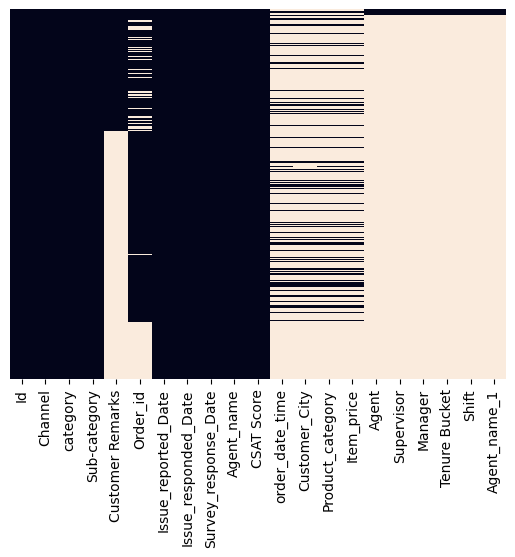

In [ ]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

Видим много пропусков. Функция join по умолчанию проводит соединение по индексу двух датафреймов в качестве ключа. То есть в нашем случае, по номеру строки. Нам же нужно указать название определенного столбца. Для такого режима соединения больше подходит функция merge

In [ ]:
data_with_agents = data_with_orders.merge(agent_data, how='left', on='Agent_name', copy=False)
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN,James Blackwell,Jackson Park,William Kim,On Job Training,Evening
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Mark Wilson,Scarlett Chen,John Smith,0-30,Morning
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN,Anthony Smith,Mia Patel,John Smith,>90,Morning
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN,Sarah Taylor,Carter Park,Jennifer Nguyen,On Job Training,Morning


<Axes: >

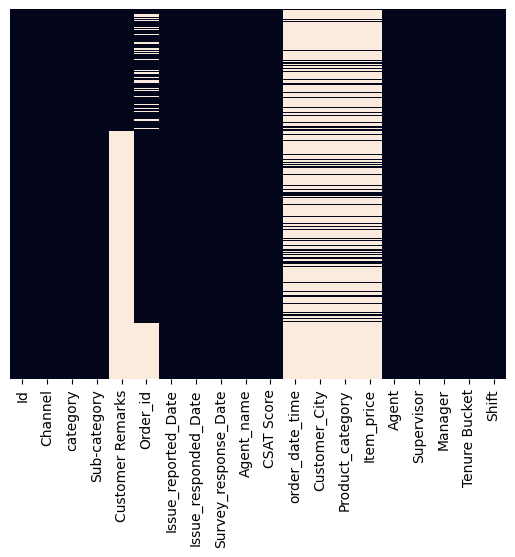

In [ ]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

Теперь отсутствующих значений совсем нет. если отследить формы датасетов, можно заметить что в итоге получилось сильно больше строк, чем было в левой таблице. При проведении левого соединения такое может случиться только если в правой таблице есть несколько записей, соответствующих по ключу одной записи в левой таблице. Давайте проверим уникальность ключа в правой таблице

In [ ]:
agent_data.Agent_name.value_counts()

,count
Agent_name,
J. Moore,6
M. Smith,4
A. Brown,4
J. Williams,4
K. Martin,4
...,...
A. Sweeney,1
A. Thornton,1
A. Marshall,1


Получается, что после сокращения имен уникальность имени оператора потеряна. Одному и тому же инициалу может соответствовать несколько разных полных имен

In [ ]:
agent_data[agent_data.Agent_name == 'J. Moore']

,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name
468,Jacob Moore,Ava Wong,Jennifer Nguyen,On Job Training,Morning,J. Moore
529,Jenna Moore,Aiden Patel,John Smith,>90,Morning,J. Moore
542,Jennifer Moore,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,J. Moore
612,Jon Moore,Ava Wong,William Kim,On Job Training,Evening,J. Moore
617,Jonathan Moore,Zoe Yamamoto,John Smith,>90,Morning,J. Moore
654,Juan Moore,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,J. Moore


Посмотрим, какое количество записей в правой таблице соответствует каждой строке в левой. Для этого соединим левую таблицу со сверткой правой таблицы по именам

In [ ]:
data_with_agent_numbers = data_with_orders.merge(agent_data.Agent_name.value_counts(), how='left', left_on='Agent_name', right_index=True)

И выведем в этой таблице статистику по распределению количества строк

In [ ]:
data_with_agent_numbers.Agent_name.value_counts()

,count
Agent_name,
D. Smith,473
W. Taylor,429
J. Williams,427
J. Smith,309
M. Castillo,301
...,...
W. Mueller,20
T. Lopez,20
R. Gordon,20


Мы видим, что все же абсолютному большинству строк основной таблицы соответствует единственная запись в таблице операторов. То есть дублирование строк - это скорее исключение. Поэтому мы можем добавить в датасет информацию об операторах в том случае, если сопоставление однозначное. А для остальных записей, которым соответствует несколько возможных имен, будут стоять пропуски. Как и положено в случае неопределенности данных.  

Для этого удалим данные об имени оператора у тех строк, где соответствие множественное

In [ ]:
agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

In [ ]:
data_with_agents = data_with_orders.merge(agent_data, how='left', on='Agent_name', copy=False)
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN,James Blackwell,Jackson Park,William Kim,On Job Training,Evening
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Mark Wilson,Scarlett Chen,John Smith,0-30,Morning
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN,Anthony Smith,Mia Patel,John Smith,>90,Morning
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN,Sarah Taylor,Carter Park,Jennifer Nguyen,On Job Training,Morning


Отобразим пропущенные значения. Видим, что все данные об операторах технической поддержки присутствуют

<Axes: >

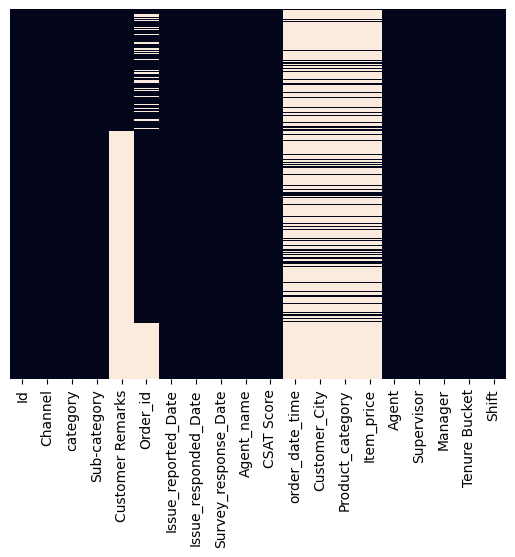

In [ ]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

В итоге мы получили датасет, содержащий максимум информации из исходных таблиц. Этот датасет пригоден к анализу и после очистки данных его можно использовать для машинного обучения.

**Задания для самостоятельного выполнения**

**Горизонтальная интеграция**

Сделаем merge между двумя первыми таблицами data1 и data2 по общему ключу

In [ ]:
horizontal_merged = pd.merge(data1, data2, on='Order_id', how='inner')
horizontal_merged.head()

,Id_x,Channel_x,category_x,Sub-category_x,Customer Remarks,Order_id,Issue_reported_Date_x,Issue_responded_Date_x,Survey_response_Date_x,Agent_name_x,CSAT Score_x,Id_y,Channel_y,category_y,Sub-category_y,Issue_reported_Date_y,Issue_responded_Date_y,Survey_response_Date_y,Agent_name_y,CSAT Score_y
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,c9cc74c5-e791-4cd3-b563-8c5b831fb32e,Inbound,Returns,Reverse Pickup Enquiry,2023-08-12 08:54:00,2023-12-08 09:15:00,2023-08-12,A. Davis,1
1,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,491d44e0-c557-4f58-a701-1d986592d3b4,Inbound,Order Related,Order status enquiry,2023-08-15 14:18:00,2023-08-15 14:25:00,2023-08-15,J. Martinez,5
2,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,f090b43c-35d2-406b-95eb-6ba652a8cb27,Outcall,Order Related,Order status enquiry,2023-08-12 20:52:00,2023-12-08 20:52:00,2023-08-12,C. Brown,4
3,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,b3c9f1e4-14b5-41d5-a784-a837bfedf5a6,Email,Cancellation,Not Needed,2023-08-27 22:36:00,2023-08-27 22:44:00,2023-08-27,M. Graham,5
4,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,7a1e1a5d-8bbd-4d0a-b9b1-f2986dad91a6,Inbound,Cancellation,Not Needed,2023-08-04 18:38:00,2023-04-08 18:50:00,2023-08-04,J. Hahn,5


Построим распределения для всех числовых признаков

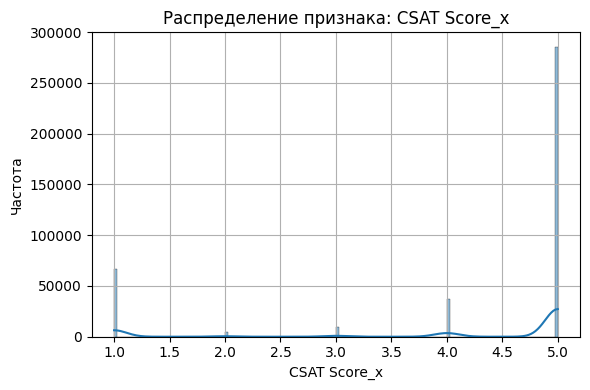

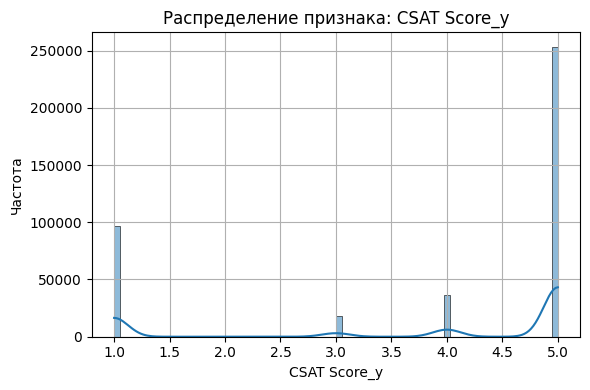

In [ ]:
numeric_cols = horizontal_merged.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(horizontal_merged[col], kde=True)
    plt.title(f'Распределение признака: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Рассмотрим информацию  соединенной таблице

In [ ]:
horizontal_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404412 entries, 0 to 404411
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id_x                    404412 non-null  object        
 1   Channel_x               404412 non-null  object        
 2   category_x              404412 non-null  object        
 3   Sub-category_x          404412 non-null  object        
 4   Customer Remarks        404412 non-null  object        
 5   Order_id                0 non-null       object        
 6   Issue_reported_Date_x   404412 non-null  datetime64[ns]
 7   Issue_responded_Date_x  404412 non-null  datetime64[ns]
 8   Survey_response_Date_x  404412 non-null  datetime64[ns]
 9   Agent_name_x            404412 non-null  object        
 10  CSAT Score_x            404412 non-null  int64         
 11  Id_y                    404412 non-null  object        
 12  Channel_y               404412

Рассмотрим разные виды соединений и рассмотрим в каком случае будет больше всего пропущенных значений

In [ ]:
horizontal_inner = pd.merge(data1, data2, on='Order_id', how='inner')
horizontal_left = pd.merge(data1, data2, on='Order_id', how='left')
horizontal_outer = pd.merge(data1, data2, on='Order_id', how='outer')

In [ ]:
print("Inner:", horizontal_inner.shape)
print("Left:", horizontal_left.shape)
print("Outer:", horizontal_outer.shape)

Inner: (404412, 20)
Left: (426801, 20)
Outer: (471073, 20)


'inner' — только пересечения (наиболее «чистый»)

'left' — всё из первой таблицы, добавляем из второй, если есть совпадение

'right' — аналогично, но приоритет у второй

'outer' — сохраняем всё из обеих таблиц, где нет совпадения — получим NaN

# Инжиниринг численных признаков
**Цель работы**  
Ознакомиться с основными приемами работы с численными атрибутами в датасетах для машинного обучения.

**Содержание работы**  
- Загрузить прилагающийся к работе датасет PRSA_Data  
- Выведите на экран основную информацию о датасете. Идентифицируйте значения вне разумного диапазона  
- Постройте визуализацию распределения каждого численного атрибута.
Исходя из распределения атрибутов по необходимости примените бинаризацию численных признаков.  
- Постройте совместное распределение каждого признака вместе с целевой переменной. Сделайте вывод о необходимости проведения группировки данных.
Удалите или ограничьте экстремальные значения атрибутов.  
- Избавьтесь от пропущенных значений в датасете.  
- При необходимости округлите излишне точные значения атрибутов.  
- Рассмотрите возможность преобразования шкалы атрибута к логарифмической.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Первоначальное знакомство с данными**

Рассмотрим датасет, содержащий информацию о разных численных показателях качества воздуха. Как всегда в первую очередь загрузим данные и выведем первые строки

In [61]:
prsa_data = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML5.2%20numeric%20features/data/PRSA_Data.csv")
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


Мы видим несколько атрибутов, характеризующих количество примесей различных газов при измерении качества воздуха. Последняя категориальная переменная в этом датасете - целевая, она обозначает класс чистоты воздуха

In [62]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


Здесь мы видим, что на первый взгляд все значения заполнены, имеются две переменные с текстовым содержимым и семь - с численным

Так как большая часть атрибутов датасета выражена численно, информативным будет посмотреть основную численную статистику по данным:

In [63]:
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


При внимательном рассмотрении нас должно смутить, что минимальное значение по многим столбцам, означающим концентрацию определенных газов, является значение -1.  
Исследование других статистик не дает нам пока никакой значимой очевидной информации, за исключением того, что разные столбцы имеют разные максимальные значения, то есть они измеряются по разным количественным шкалам. Это может навести нас на мысль о необходимости использования нормализации.

**Идентификация ошибочных значений**

Первым этапом анализа данных должно быть устранение явных ошибок в данных - значений атрибутов вне разумного диапазона. Значение концентрации газа в воздухе просто по смыслу не может быть отрицательным. При этом во всем датасете во всех колонках присутствует только одно отрицательное значение

Будем считать, что отрицательные значения - это пропуски. Заменим их на np.nan, чтобы они явно отображались как пропуски и мы смогли в дальнейшем корректно с ними работать

In [64]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


Убедимся, что все численные столбцы принимают неотрицательные значения

In [65]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         34489 non-null  float64
 3   NO2         33994 non-null  float64
 4   CO          33252 non-null  float64
 5   O3          32957 non-null  float64
 6   PRES        35044 non-null  float64
 7   RAIN        35044 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35050 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


**Визуализация распределения атрибутов**

После того, как мы вычистили явные ошибки в данных, можно познакомиться с эмпирическим распределением каждого признака. Для этого можно использовать разные средства визуализации, например, гистограмму

<Axes: xlabel='SO2', ylabel='Count'>

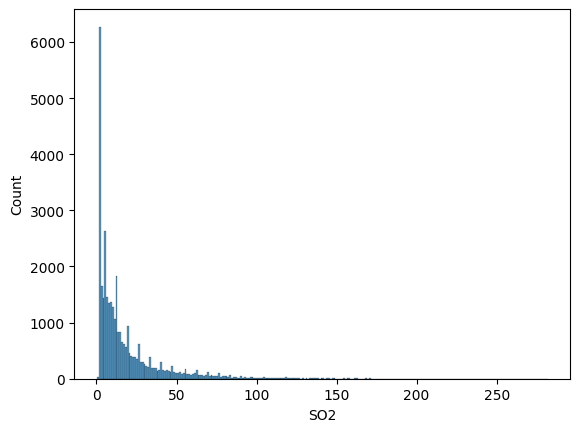

In [66]:
sns.histplot(prsa_data.SO2)

Здесь мы видим, какие значения концентрации SO2 присутствуют в датасете.  
Налицо явная зависимость - чем меньше значение, тем оно вероятнее. Очень большие концентрации встречаются крайне редко. Плюс, на графике можно заметить определенные пики через равные промежутки значений. Это может свидетельствовать о попытках заполнения пропущенных значений или об округлении некоторых значений.

График ядерной оценки плотности распределения

<Axes: xlabel='NO2', ylabel='Density'>

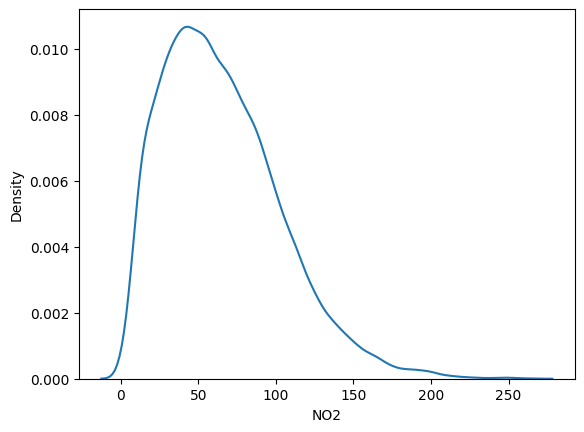

In [67]:
sns.kdeplot(prsa_data.NO2)

Здесь мы видим уже другое распределение - более распространены значения, близкие к 50. Вот распределение значений концентрации CO

<Axes: xlabel='CO', ylabel='Count'>

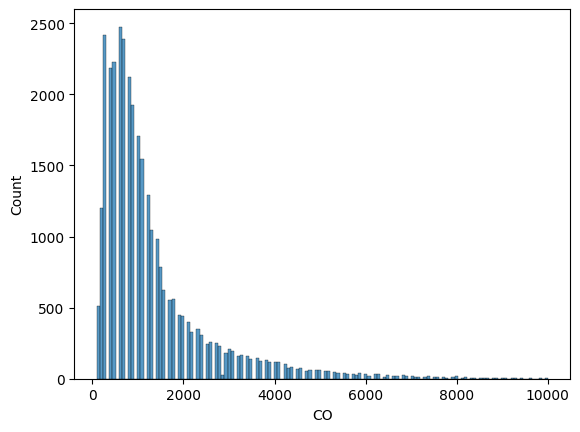

In [68]:
sns.histplot(prsa_data.CO)

Здесь видно достаточно гладкое распределение с модой в районе 1000.

Вот более смещенное распределение - O3. На гистограмме явно видно, что нулевая концентрация встречается гораздо чаще ненулевых значений. В дальнейшем это может быть кандидат на бинаризацию

<Axes: xlabel='O3', ylabel='Count'>

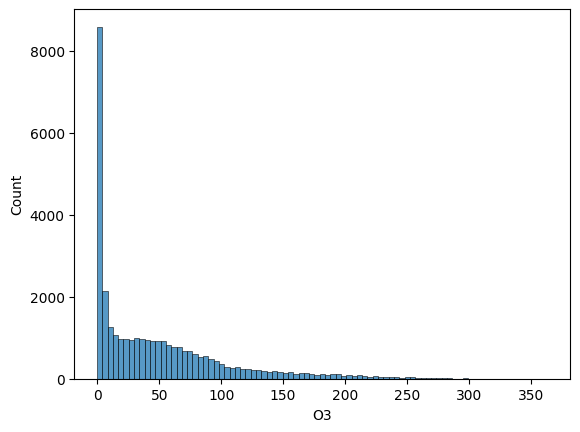

In [69]:
sns.histplot(prsa_data.O3)

Распределение значения давления отличается от всех предыдущих. Видно, что есть некоторый диапазон условно равновероятных, "нормальных" значений, а частота значений давления вне этого диапазона быстро спадает  
Распределение давления PRES. Есть некоторый диапазон условно равновероятных, "нормальных" значений, а частота значений давления вне этого диапазона быстро спадает

<Axes: xlabel='PRES', ylabel='Count'>

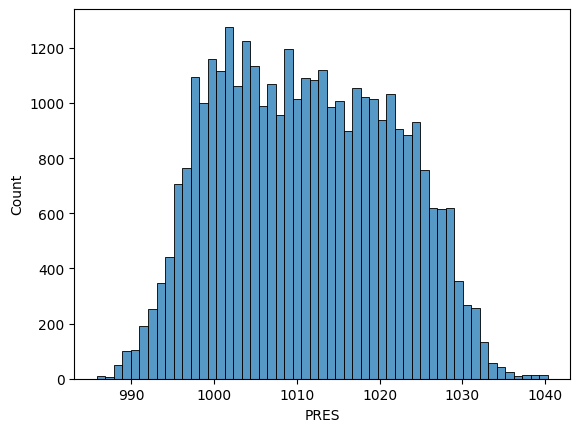

In [70]:
sns.histplot(prsa_data.PRES)

Количество осадков

<Axes: xlabel='RAIN', ylabel='Count'>

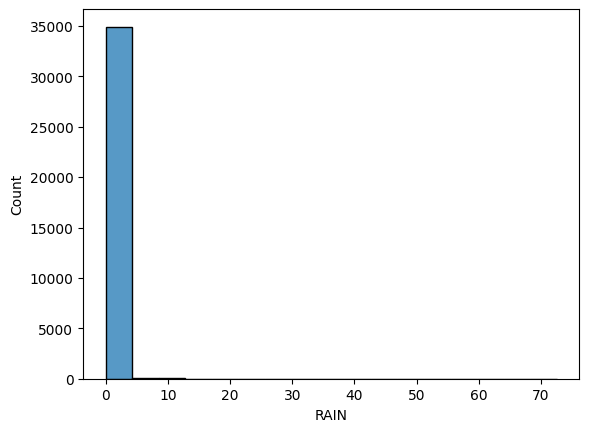

In [71]:
sns.histplot(prsa_data.RAIN)

Мы видим, что отсутствие осадков - самое распространенное значение. Ненулевые значения тут встречаются в подавляющем меньшинстве точек данных

<Axes: xlabel='WSPM', ylabel='Count'>

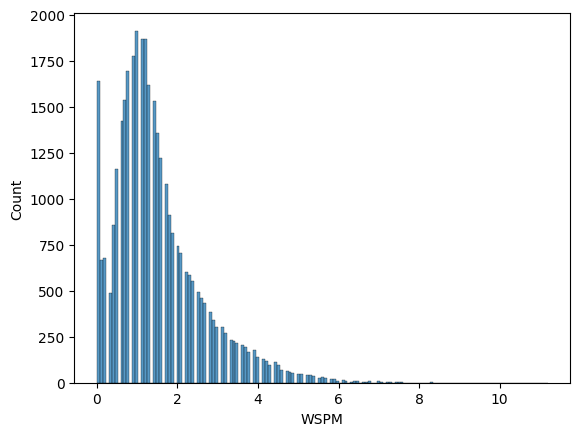

In [72]:
sns.histplot(prsa_data.WSPM)

**Бинаризация атрибутов**

Такие распределения, как в атрибуте "количество осадков" могут повредить эффективности модели, так как относительное численной значение при таком распределении не несет, по сути, статистической значимости по сравнению с информацией о том, были ли вообще осадки или нет. То есть этот атрибут из численного можно превратить в категориальный. Ведь в нашем датасете всего 1436 точек из 35 000 имеют ненулевое значение

In [73]:
prsa_data.RAIN[prsa_data.RAIN > 0]

,RAIN
267,0.1
268,0.4
269,0.1
270,0.9
271,0.9
...,...
34891,0.2
34892,0.7
34893,0.9
34894,0.4


Введем в модель новый категориальный, а точнее, бинарный атрибут, кодирущий наличие либо отсутствие осадков в данном измерении

In [74]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


**Визуализация связи атрибутов с целевой переменной**

После первоначального преобразования данных нужно определить, как именно связаны различные атрибуты со значением целевой переменной. Так как мы исследуем численные атрибуты при категориальной целевой переменной, то воспользуемся визуализацией нескольких оценок плотности распределения для разных классов

<Axes: xlabel='SO2', ylabel='Density'>

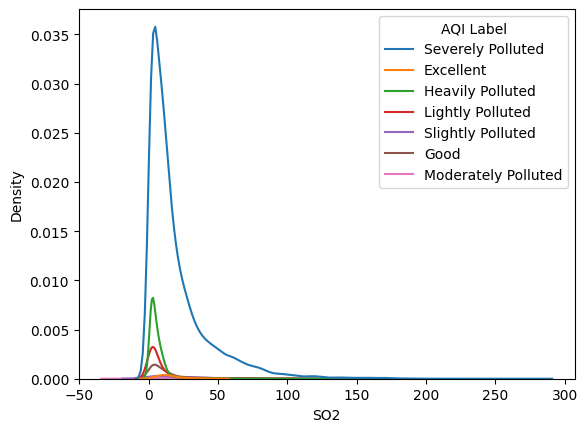

In [75]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

Мы получим на графике несколько линий, каждая из которых соответствует распределению выбранного атрибута при разных значениях целевой переменной

Так как у нас наблюдается дисбаланс классов (это мы еще не исследовали, но из данного графика ясно видно, что всего объектов разных классов сильно разное количество), то нам не очень важен на таких графиках конкретный уровень каждой линии. Важно понять, есть ли участки на горизонтальной оси, на которых соотношение разных существенно отличается.

Например, на первом графике, явных изменений в форме разных линий нет. Можно предположить, что изолированно данный атрибут не сильно влияет на значение целевой переменной. Пойдем дальше и визуализируем второй атрибут

<Axes: xlabel='NO2', ylabel='Density'>

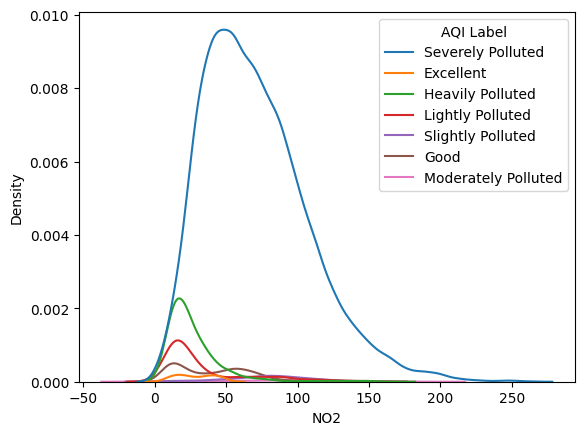

In [76]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label")

Здесь уже видны различия между соотношениям разных классов. Но они не очень ярко выраженные. Перейдем к третьему атрибуту

<ipython-input-77-0dcfe490e9c4>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")


<Axes: xlabel='CO', ylabel='Density'>

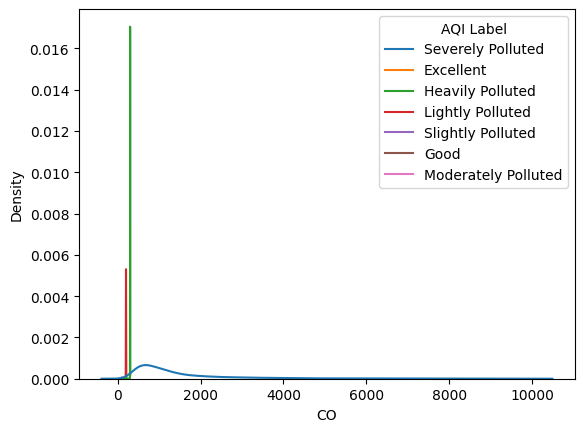

In [77]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")

Данный график очень смещен из-за того, что плотности некоторых классов сильно сконцентрированы, что искажает масштаб графика. В таких случаях помогает попробовать изобразить этот же график, но с логарифмическим масштабом вертикальной оси

<ipython-input-78-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

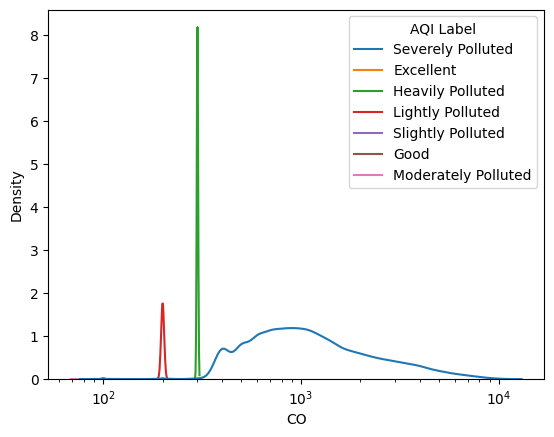

In [78]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

На некоторых участках диапазона значений данного атрибута преобладает значение "Lightly polluted", на других - "Heavily polluted". Это значит, что данный атрибут очень важен для предсказания значения целевой переменной. В дальнейшем мы используем эту информацию для категоризации этого атрибута

Следующие графики демонстрируют схожее поведение разных классов с поправкой на общую форму распределения разных атрибутов

<Axes: xlabel='O3', ylabel='Density'>

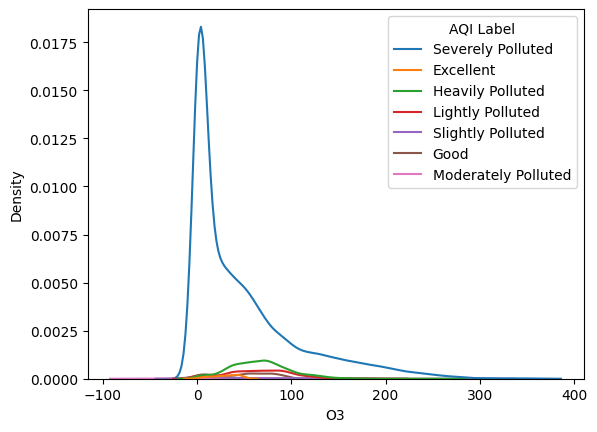

In [79]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label")

<Axes: xlabel='PRES', ylabel='Density'>

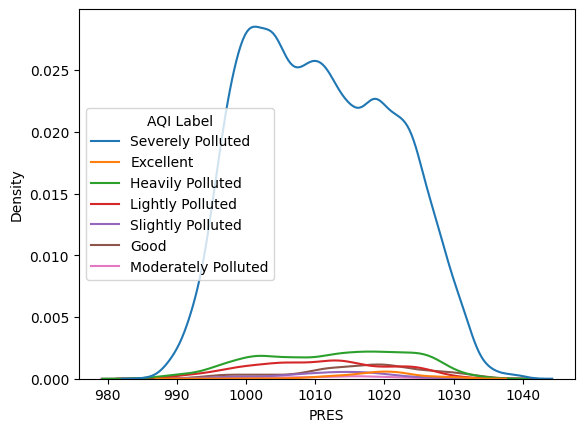

In [80]:
sns.kdeplot(data=prsa_data, x="PRES", hue="AQI Label")

<Axes: xlabel='WSPM', ylabel='Density'>

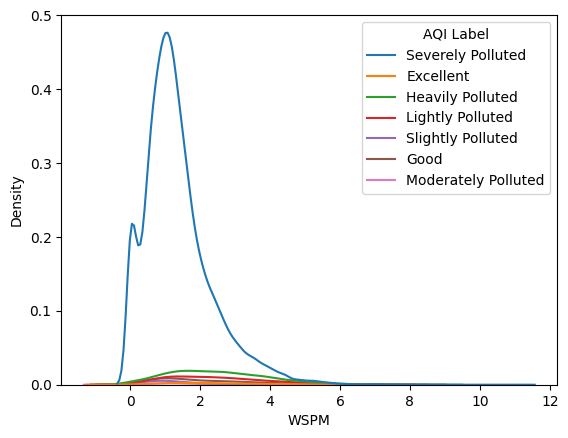

In [81]:
sns.kdeplot(data=prsa_data, x="WSPM", hue="AQI Label")

В целом, анализ влияния атрибутов показывает, что их влияние скорее проявляется в совокупности. Нет одного четко дифференцирующего фактора, особенно указывающего на все возможные значения целевой переменной.

**Группировка численных значений**

В некоторых случаях можно объединить численные значения атрибутов на метку диапазона значений. То есть мы группируем объекты по значению данного атрибута и затем заменяем сам численный атрибут на ту группу, в которую попал объект. Этот прием называется дискретизация или группировка численных значений.

<ipython-input-82-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

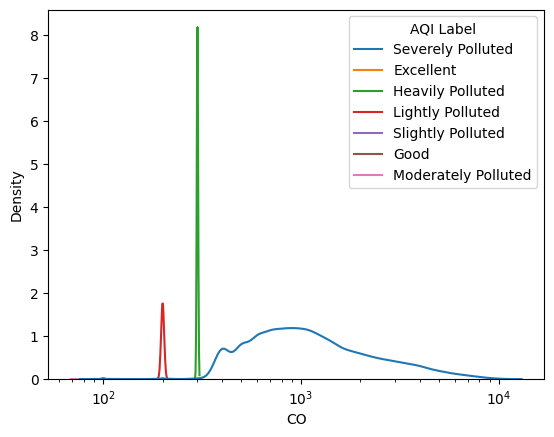

In [82]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

Для значения целевой переменной не так важно конкретное численной значение концентрации CO в воздухе. Достаточно информации, в какой диапазон попадает данное измерение. Поэтому попробуем добавить к датасету атрибут "Группа по CO":

In [83]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


Здесь у нас возникает проблема. Так как в исходном столбце были пропущенные значения, в получившемся столбце тоже будут пропуски. Так как этот новый атрибут - категориальный, проще всего сразу заполнить пропущенные значения специальным названием класса. В данном случае, естественно будет присвоить этому классу метко "0", что будет означать - "значение неизвестно"

In [84]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


**Удаление экстремальных значений**

Клиппинг - замена экстремальных значений атрибутов граничными.  
Возьмем для примера колонку "PRES" нашего датасета. В данном примере определим границы экстремальных значений опять же на глаз. И заменим все значения, находящиеся вне этих границ

In [85]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<ipython-input-85-5a60bf876b2e>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prsa_data.PRES[prsa_data.PRES <= 992] = 992
<ipython-input-85-5a60bf876b2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

<Axes: xlabel='PRES', ylabel='Count'>

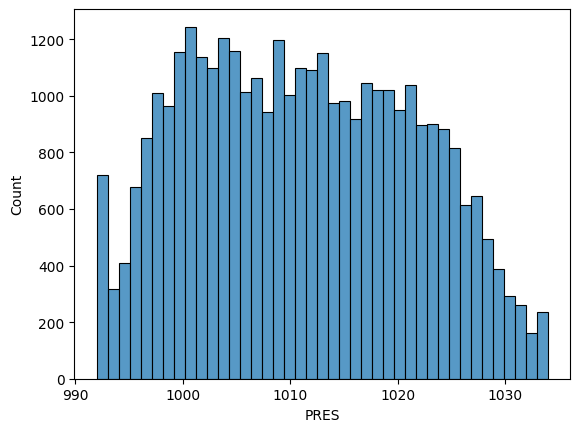

In [86]:
sns.histplot(prsa_data.PRES)

Изменим значения границ вручную

In [87]:
prsa_data.PRES[prsa_data.PRES <= 992] = 1020
prsa_data.PRES[prsa_data.PRES >= 1034] = 1040

<ipython-input-87-f9414f6871b3>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prsa_data.PRES[prsa_data.PRES <= 992] = 1020
<ipython-input-87-f9414f6871b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

<Axes: xlabel='PRES', ylabel='Count'>

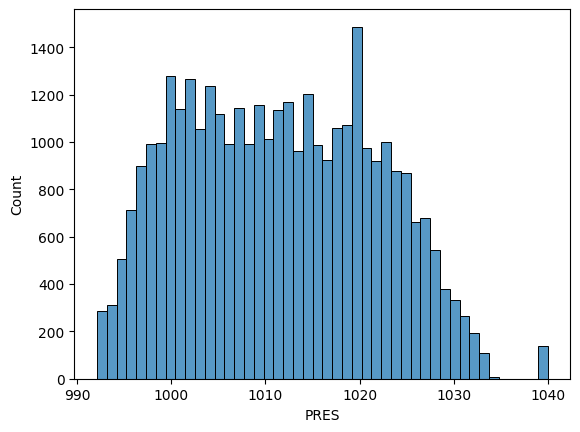

In [88]:
sns.histplot(prsa_data.PRES)

Видим, что распределение стало другим, как бы подвинувшись в левую часть. Видим, что в части от 1030 до 1040 данные практически отсутствуют

**Так неудобно подбирать значения границ, сделаем адаптивный клиппинг через процентили (Сам. задания)**

In [89]:
def adaptive_clip(series, low=0.01, high=0.99):
    return series.clip(series.quantile(low), series.quantile(high))

prsa_data['PRES'] = adaptive_clip(prsa_data['PRES'])

<Axes: xlabel='PRES', ylabel='Count'>

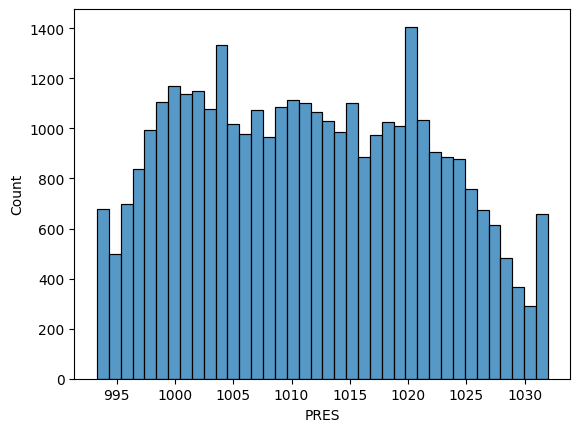

In [90]:
sns.histplot(prsa_data.PRES)

Видим, что адаптивный клиппинг больше подстраивается под данные и показывает лучше результаты, чем делать это вручную

**Заполнение пропусков**

Визуализируем пропущенные значения в данных

<Axes: >

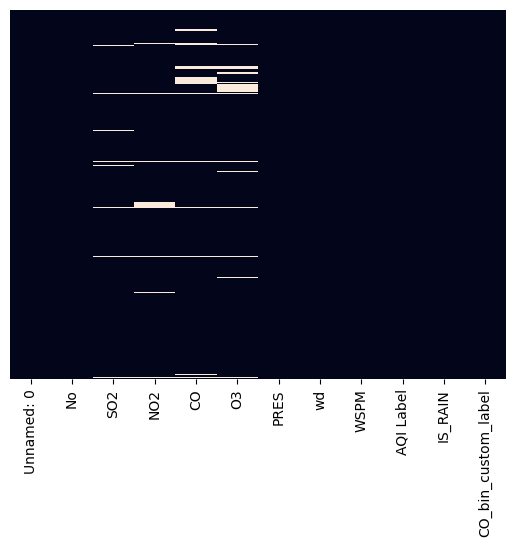

In [45]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

Можно обратить внимание на то, что в датасете прослеживаются горизонтальные полосы. Это объекты, по которым неизвестны значения нескольких атрибутов. Можно вывести индексы объектов, у которых неизвестно значение более двух атрибутов

In [46]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

,0
3,2
276,3
435,2
459,2
555,2
...,...
34880,4
34883,4
34885,4
35029,2


Так как такие незаполненные объекты составляют очень малый процент выборки, для простоты обработки их можно просто удалить

In [47]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

<Axes: >

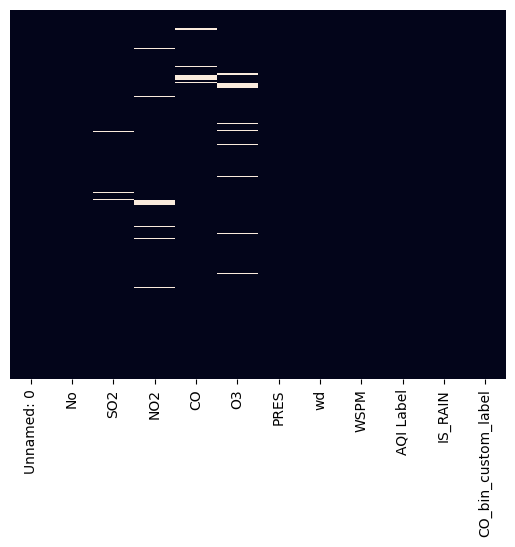

In [48]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

Теперь после удаления видно, что пропуски группируются по столбцам

Выведем количество пропущенных значений для каждого атрибута

In [49]:
prsa_data.isnull().sum()

,0
Unnamed: 0,0
No,0
SO2,281
NO2,702
CO,1028
O3,1300
PRES,0
wd,0
WSPM,0
AQI Label,0


Мы видим, что пропуски присутствуют в четырех столбцах. При этом в одном из них пропусков сильно меньше:  
По столбцу SO2 пропущено всего 281 значение. Это менее одного процента выборки. Можно просто заменить пропуски на среднее значение. Но так как эмпирическое распределение этого признака имеет большую асимметрию, лучше использовать медиану

In [50]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

С другими столбцами, например, O3 искажение будет более существенным. Поэтому воспользуемся заполнением не средним, а случайным значением. Для этого сначала сформируем временную серию, содержащую все пропуски из данного столбца

In [51]:
filler = prsa_data.O3[prsa_data.O3.isna()]

Нам важно, чтобы в этой серии сохранился исходный индекс - номера строк с пропусками исходного датасета. Это мы используем при заполнении этой серии данными. В этом примере не будем генерировать случайные значения их какого-то распределения, а просто семплируем их из существующих значений

In [52]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [53]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

Вот как выглядит распределение значений данного атрибута после заполнения пропусков

<Axes: xlabel='O3', ylabel='Count'>

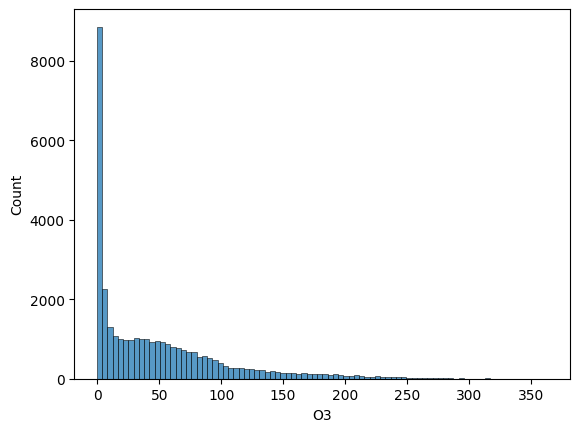

In [54]:
sns.histplot(prsa_data.O3)

**Округление атрибутов**

При визуальном осмотре датасета можно заметить, что все численные значения имеют один знак после запятой. Но столбец O3 записан с гораздо большей точностью - 5 знаков после запятой. Такая точность является избыточной, так как получается, что в этой колонке записаны 7 значащих цифр. От лишних данных можно избавиться, просто округлив данные значения

In [55]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,1011.459321,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


**Логарифмирование атрибутов**

Математические модели лучше всего работают с распределениями, похожими на равномерное или нормальное. Очень большой дисбаланс в распределении может быть вреден для эффективности.  
В столбце SO2 значения сильно смещены - малых знаений очень много, а больших значений мало. Применим к атрибуту логарифм, чтобы преобразовать его к более равномерному.

<Axes: xlabel='SO2', ylabel='Count'>

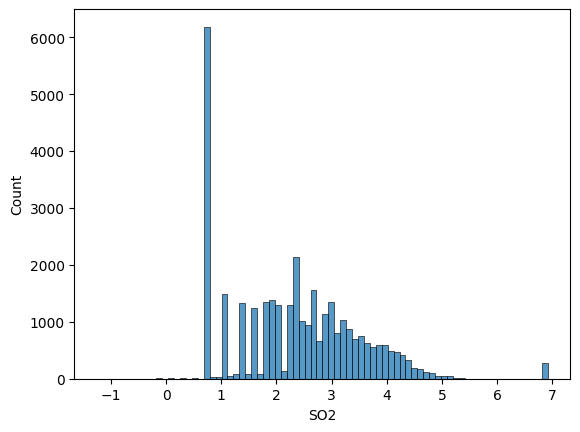

In [56]:
prsa_data.SO2 = np.log(prsa_data.SO2)
sns.histplot(prsa_data.SO2)

При таком равномерном распределении информации модели будет легче работать с этим признаком

**Задания для самостоятельного выполнения**

Чтобы понять, какие числовые признаки сильно коррелируют, а какие — почти независимы построим кореллограмму по всем численным столбцам датасета. Сделаем вывод о значимости признаков.

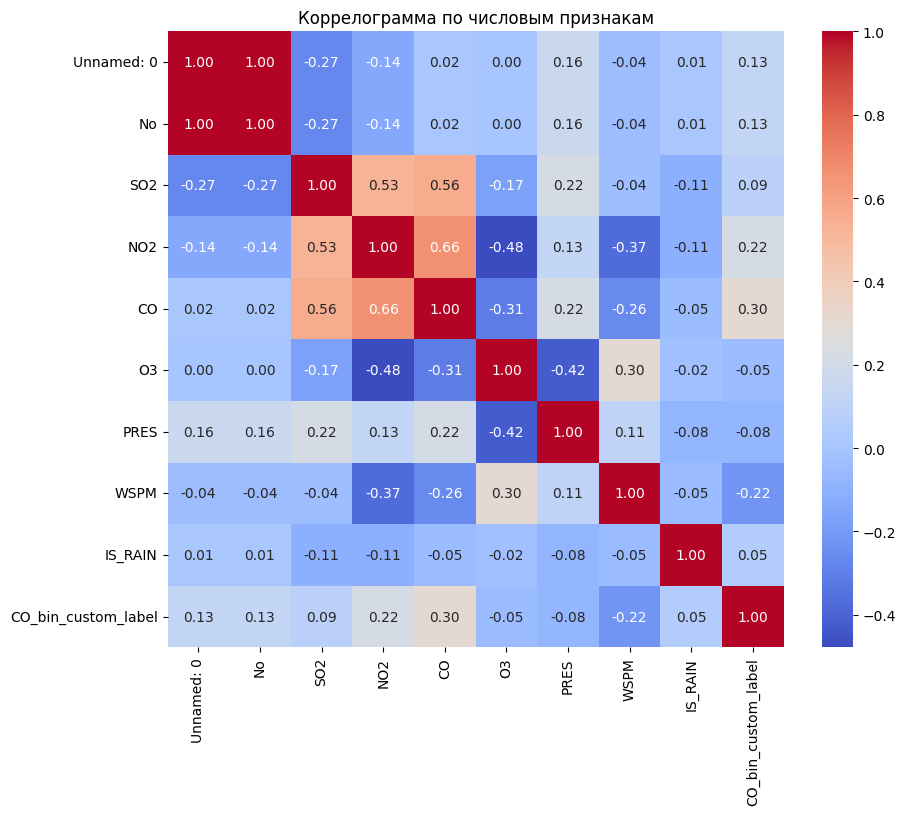

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = prsa_data.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Коррелограмма по числовым признакам")
plt.show()

По матрице корреляции видно, что 3 основных атрибута SO2, CO и NO2 имеют сильную корреляцию  
Отрицательные значение - признаки совсем не связаны

Визуализируем связь между признаками

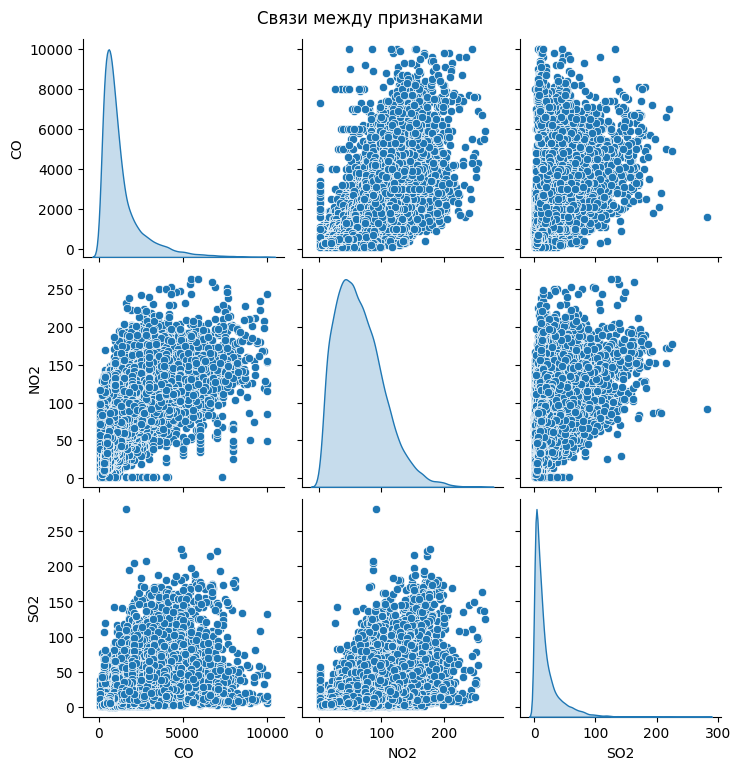

In [95]:
sns.pairplot(numeric_df[['CO', 'NO2', 'SO2']], diag_kind='kde')
plt.suptitle("Связи между признаками", y=1.02)
plt.show()

# Инжиниринг категориальных признаков
**Цель работы**  
Ознакомиться с основными приемами работы с категориальными атрибутами в датасетах для машинного обучения.

**Содержание работы**  
- Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support. Выведите основную информацию по каждому датасету и сделайте выводы.  
- Визуализируйте распределение каждого категориального признака в датасете
Customer support. Учитывайте количество уникальных значений.  
- Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.  
- Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.  
- Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.
Заполните отсутствующие значения в датасете.  
- На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.  
- В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Чтение датасета Customer**

Используем датасет Customer Support. В датасете большое количество категориальных атрибутов. При этом целевая переменная - оценка удовлетворенности - является численной. То есть перед нами датасет для задачи регрессии.

In [97]:
CS_data = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML5.3%20categorical%20features/data/Customer_support_data.csv")
CS_data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [98]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Основная информация о колонках показывает, что в датасете есть большое количество пропусков. Также видим общую информацию о форме набора данных

Выведем количество заполненных значений, количество уникальных значений, модальное значение и частоту этого самого вероятного значения

In [99]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


Самое полезное в этой таблице - соотношение количества уникальных к общему количеству значений по колонке. Если они совпадают или близки, это значит, что в атрибуте все или почти все значения разные. В таком случае стоит задуматься о его удалении, либо преобразовании.

**Чтение датасета Titanic**

In [100]:
T_data = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML5.3%20categorical%20features/data/titanic.csv")
T_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Описательная статистика
unique — количество уникальных значений  
top — наиболее частое значение  
freq — частота наиболее часто встречающегося значения



In [101]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Dooley, Mr. Patrick",male,347082,G6,S
freq,491,1,577,7,4,644


Здесь явно видно, например, что имя - полностью уникальный атрибут. А вот в одной каюте могло находиться до четырех человек. Что удивительно, номера билетов почему-то тоже повторяются.

Обратите внимание но то, как в нашем варианте этого датасета обозначается класс обслуживания: названием, а не числом. Это нам понадобится позднее.

**Визуализация распределения атрибутов и связь с целевой переменной**

Построим гистограмму распределения первого существенного атрибута

<Axes: xlabel='channel_name', ylabel='Count'>

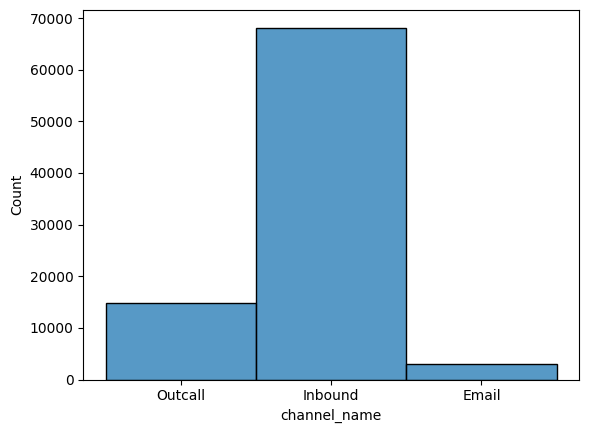

In [102]:
sns.histplot(data=CS_data, x="channel_name")

На гистограмме мы видим категории каналов. На нем видна неравномерность распределения - объектов одной категории сильно больше, чем других

Это уже информацию можно вывести в табличном виде. Для подсчета количества объектов со всеми возможными вариантами значения по определенной колонке

In [103]:
CS_data.channel_name.value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


Сразу же построим совместное распределение данного признака и целевой переменной. Так как признак категориальный, а целевая переменная - численная, мы можем построить на столбчатой диаграмме среднее значение целевой переменной для каждой категории:

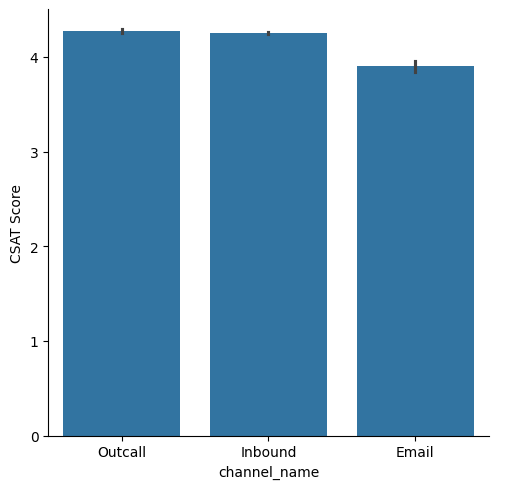

In [104]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

Видно, что средние значения для первый двух категорий отличаются несущественно, а по третьей - сильно ниже. Можно сделать вывод, что канал обращения влияет на потенциальную удовлетворенность клиента и обращения по электронной почте меньше нравятся клиентам

Перейдем к следующей категориальной переменной. Прежде чем строить гистограмму выведем таблицу значений

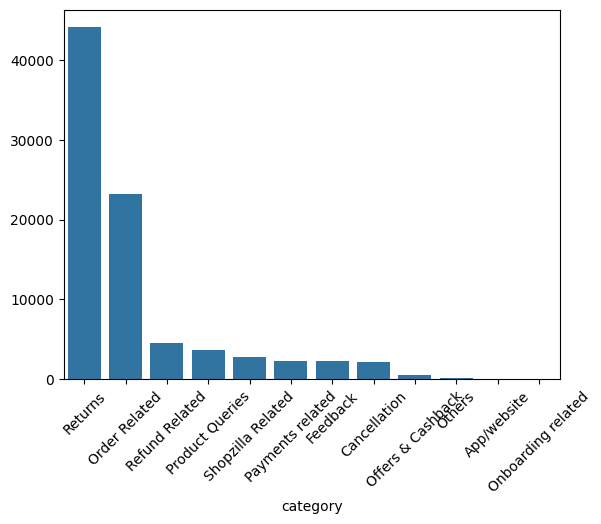

In [107]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

В данном случае, наблюдается типичный для таких распределений дисбаланс категорий. Присутствуют очень малочисленные категории. В таких случая стоит подумать над объединением категорий. Хотя представленный на графике случай еще далеко не самый экстремальный.

Можем видеть наличие влияния: есть разница между средним значением целевой переменной для разных категорий. При этом есть категория, которой соответствует очень низкое значение удовлетворенности. Из этой аналитики тоже можно сделать значимые выводы.

**Укрупнение категорий**

Поэтому при возможности можно постараться укрупнить категории, то есть объединить близкие по смыслу значения атрибута. Посмотрим, например, на отзывы клиента. При анализе мы уже пришли к выводу, что если отзыв присутствует, то он скорее всего положительный. Поэтому можно бинаризировать этот атрибут - если отзыв есть, ставим 1, если нет - 0:

Проверим длину строки, чтобы отсечь пустые отзывы, часть их которых обозначена в данных как "NAN".

In [110]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)
CS_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0


Точно также можно бинаризировать и наличие заказа, добавив новый атрибут Is_order (1 - если заказ есть, и 0 - если нету)

In [111]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)
CS_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0


А вот с другими категориальными переменным так просто уже не поступишь. Например, подкатегория обращения. Здесь мы видим большое количество малопопулярных значений. Часто в такой ситуации можно объединить редкие значения в одно, "Иное"

In [113]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Объединение редких значений - отличный способ радикально сократить количество столбцов в датасете после кодирования номинальных признаков. Однако, нужно проверять эффективность данного приема на метриках, и выбирать такое объединение, которое как можно меньше вредит эффективности модели. Как правило, чем больше значений мы объединяем, тем больше потери информации и потенциальное снижение качества модели.

**Добавление агрегированной информации**

Можно вместо имени оператора технической поддержки добавить колонку, отражающую загруженность данного оператора. Вполне логично выдвинуть гипотезу о том, что загруженность оператора влияет на качество его работы и, как следствие, на удовлетворенность клиентов

Можно вывести информацию о количестве записей в колонке, сгруппированных по имени оператора

In [114]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


А для того, чтобы добавить колонку с количеством клиентов у соответствующего операторам можно вот так скомбинировать несколько функций pandas

In [115]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')
CS_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Other,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0,42
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0,32
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0,35
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0,48
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Other,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0,124


Точно так же можно поступить и с количеством операторов у одного руководителя. Но теперь нам понадобится другая агрегирующая функция, так как значения имени оператора могут повторяться

In [116]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


Мы видим управленческую нагрузку руководителей

Добавим эту информацию в датасет

In [117]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')
CS_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Other,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0,42,41
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0,32,17
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0,35,46
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0,48,28
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Other,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0,124,29


**Заполнение отсутствующих значений**

В отличие от численных атрибутов, заполнение пропусков в категориальных переменных значительно проще. В большинстве случаев наиболее адекватным будет заполнение неизвестных значений специальны

In [118]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

Заполним численные переменные специальными значениями

In [119]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

**Преобразование бинарных атрибутов**

Для иллюстрации методов преобразования категориальных переменных в численные нам больше подойдет второй датасет, прилагающийся к данной работе - Титаник.

Начнем с самого простого типа категориальных атрибутов - бинарных. Их можно преобразовывать как угодно. Самый компактный способ - LabelEncoder

In [121]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

T_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Этот способ кодирования просто заменяет значения атрибута на последовательные целые числа. В данном случае, 0 или 1 в произвольном порядке

**Преобразование порядковых атрибутов**

Порядковые атрибуты, то есть такие, значения которых можно сравнивать друг с другом, чаще всего приходится заменять с помощью вручную составленного словаря, чтобы соблюсти естественный порядок значений. Рассмотрим, например, класс обслуживания на Титанике.

In [122]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

T_data.head()

<ipython-input-122-b85e23fb0c3d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  T_data.Pclass.replace({
<ipython-input-122-b85e23fb0c3d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T_data.Pclass.replace({


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


**Преобразование номинальных атрибутов**

Номинальные атрибуты, к которым относится большинство категориальных, можно преобразовывать только с использованием OneHotEncoder. Этот способ кодирования следует выбирать в случае сомнений в типе шкалы атрибута. Продемонстрируем работу этого кодировщика

In [123]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

Для формирования таблицы с преобразованными данными нам понадобится сформировать список названий колонок

In [124]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [126]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)
dummies.head()

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


На жаном примере достаточно очевидна схема работы этого кодировщика. Они преобразует одну колонку с множеством значений в множество колонок с бинарными значениями.
Объединение с исходным датасетом

In [127]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

В итоге получается датафрейм с увеличенным количеством колонок

**Удаление лишних столбцов и массовое преобразование**

Вернемся к первому датасету. Массово преобразуем все категориальные атрибуты в бинарные признаки по методу OneHotEncoder

In [128]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

CS_dummies = pd.get_dummies(CS_dropped)

CS_dummies.shape

(85907, 258)

Наш датасет принимает более компактную форму:

In [129]:
CS_dummies.head()

,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,5,0,0,42,41,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,5,0,0,32,17,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,5,0,0,35,46,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,5,0,0,48,28,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,5,0,0,124,29,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False


Теперь одной инструкцией можно массово преобразовать все категориальные атрибуты в бинарные признаки по методу OneHotEncoder

In [130]:
CS_dummies = pd.get_dummies(CS_dropped)

После этого преобразования количество столбцов в датасете может произвольно увеличиться. В данном случае мы проконтролировали этот процесс, но все равно получили в несколько раз больше колонок, чем было

In [131]:
CS_dummies.shape

(85907, 258)

# Работа с целевой переменной
**Цель работы**  
На практическом примере освоить основные этапы и приемы интеграции разных таблиц данных в единый датасет средствами Python и pandas для последующей подготовки к машинному обучению.  

**Содержание работы**  
- Прочитайте три однотипных файла с данными по обращениям клиентов в службу технической поддержки. Познакомьтесь со структурой этих трех таблиц и их особенностями.  
- Объедините три эти таблицы в один общий датасет с максимальным соблюдением внутренней согласованности данных.  
- Прочитайте датасет с данными заказов клиентов, присоедините максимальное количество данных из него к датасету, получившемуся на предыдущем шаге.  
- Прочитайте датасет с данными о менеджерах службы клиентской поддержки и также присоедините данные из него к общему датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Отбор признаков по важности**

Испотльзуем набор данных с сайта OpenML

In [2]:
from sklearn.datasets import fetch_openml
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548
